# Análise Exporatória dos Dados
### Atributos dos agentes Imóveis, entendimento do negócio, Insights e seleção de indicadores

## Importação Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics as sts

### Importação da base

In [2]:
df = pd.read_excel(r'C:\Users\pfern\Desktop\Monografia\Dados\Dados_principal\Data_Frame.xlsx')

In [3]:
df.head()

,Início,Término,Tipo,Taxa de administração,Taxa adm,Aluguel,Vaga Garagem,Entrada_imobiliaria,Lugar,Numero_contrato,...,Tempo_total_dias,Portabilidade,Receita_imobiliaria,Receita_imobiliaria_ociosa,Receita_locador,Receita_locador_ociosa,Trim_inicio_contrato,Ano_contrato,Condominio,IPTU
0,2020-01-03,2022-07-01,Residencial,0.05,285.0000,5700.00,0,2019-11-06,artarq 101,1,...,968,nao,8645.00000,551.00000,164255.00000,10469.00000,T1-2020,2020,1444.00,494.55
1,2020-01-20,2022-07-01,Residencial,0.05,285.0000,5700.00,0,2020-01-03,artarq 162,1,...,910,nao,8483.50000,161.50000,161186.50000,3068.50000,T1-2020,2020,1444.00,494.55
2,2018-05-18,2020-11-01,Residencial,0.04,180.8436,4521.09,1,2018-01-27,artarq 193,1,...,1009,nao,5413.25176,669.12132,129918.04224,16058.91168,T2-2018,2018,800.39,308.98
3,2018-05-01,2020-04-24,Residencial,0.07,300.4323,4291.89,1,2018-03-15,artarq 203,1,...,771,nao,7250.43284,470.67727,96327.17916,6253.28373,T2-2018,2018,800.39,308.98
4,2020-04-24,2022-10-01,Residencial,0.07,304.5000,4350.00,1,2020-04-24,artarq 203,2,...,890,nao,9033.50000,0.00000,120016.50000,0.00000,T2-2020,2020,800.39,308.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Início                      173 non-null    datetime64[ns]
 1   Término                     173 non-null    datetime64[ns]
 2   Tipo                        173 non-null    object        
 3   Taxa de administração       173 non-null    float64       
 4   Taxa adm                    173 non-null    float64       
 5   Aluguel                     173 non-null    float64       
 6   Vaga Garagem                173 non-null    int64         
 7   Entrada_imobiliaria         173 non-null    datetime64[ns]
 8   Lugar                       173 non-null    object        
 9   Numero_contrato             173 non-null    int64         
 10  Endereco                    173 non-null    object        
 11  Latitude                    173 non-null    float64       

## Tratamento NA

In [5]:
na = df[df['Portabilidade'].isnull()]

In [6]:
df.loc[df['Portabilidade'].isnull(), 'Portabilidade'] = 'sim'

### Ajuste tipos de variáveis

In [7]:
df.dtypes

Início                        datetime64[ns]
Término                       datetime64[ns]
Tipo                                  object
Taxa de administração                float64
Taxa adm                             float64
Aluguel                              float64
Vaga Garagem                           int64
Entrada_imobiliaria           datetime64[ns]
Lugar                                 object
Numero_contrato                        int64
Endereco                              object
Latitude                             float64
Longitude                            float64
Tempo_ocupado                          int64
Tempo_vago                             int64
Tempo_total_dias                       int64
Portabilidade                         object
Receita_imobiliaria                  float64
Receita_imobiliaria_ociosa           float64
Receita_locador                      float64
Receita_locador_ociosa               float64
Trim_inicio_contrato                  object
Ano_contra

In [8]:
df['Ano_contrato'] = df['Ano_contrato'].astype('str')

## Separação de variáveis numéricas em variáveis categóricas

In [9]:
num = df.select_dtypes(include = ['int64', 'float64'])
cat = df.select_dtypes(exclude = ['int64', 'float64', 'datetime64[ns]'])

## Eliminando colunas irrelevantes
### variáveis que não apresentam nenhuma informação relevante ou correlação conhecida a priori 

In [10]:
num.drop(['Taxa de administração', 'Numero_contrato', 'Latitude', 'Longitude'], axis = 1, inplace = True)

C:\Users\pfern\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Análise Univariada

In [11]:
# tendencia central: media, mediana, moda
c1 = pd.DataFrame(num.apply(sts.mean)).T
c2 = pd.DataFrame(num.apply(sts.median)).T
c3 = pd.DataFrame(num.apply(sts.mode)).T
# dispersao: min, max, std, range, skew (assimetria), kurtosis (curtose)
d1 = pd.DataFrame(num.apply(sts.stdev)).T 
d2 = pd.DataFrame(num.apply(min)).T
d3 = pd.DataFrame(num.apply(max)).T
d4 = pd.DataFrame(num.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num.apply(lambda x: x.kurtosis())).T
# Concatenar colunas
table = pd.concat([c1, c2, c3, d1, d2, d3, d4, d5, d6]).T.reset_index()
# renomeia colunas
table.columns = ['index', 'mean', 'median', 'mode', 'std', 'min', 'max', 'range', 'skew', 'kurtosis']

In [12]:
table

,index,mean,median,mode,std,min,max,range,skew,kurtosis
0,Taxa adm,158.967728,130.00000,119.00,88.145474,0.0,688.396500,688.396500,2.080997,7.823241
1,Aluguel,2648.183179,2083.36000,1500.00,2059.890810,1000.0,22946.550000,21946.550000,6.060141,54.921084
2,Vaga Garagem,0.653179,1.00000,0.00,0.767019,0.0,4.000000,4.000000,1.544648,3.745590
3,Tempo_ocupado,741.826590,881.00000,904.00,242.069287,0.0,1449.000000,1449.000000,-0.742690,1.006115
4,Tempo_vago,215.878613,82.00000,0.00,283.292688,0.0,1180.000000,1180.000000,1.467268,1.442551
5,Tempo_total_dias,957.705202,911.00000,904.00,380.195482,41.0,2063.000000,2022.000000,0.409813,0.433370
6,Receita_imobiliaria,4058.773118,3201.80861,0.00,2953.613073,0.0,20284.750200,20284.750200,2.131281,7.467419
7,Receita_imobiliaria_ociosa,1064.083290,396.00000,0.00,1535.939697,0.0,8516.083333,8516.083333,2.069078,4.769764
8,Receita_locador,64404.489024,47067.30000,63866.40,63643.812968,0.0,655873.589800,655873.589800,5.412715,44.496811
9,Receita_locador_ociosa,16178.898271,6204.00000,0.00,22934.792276,0.0,113142.250000,113142.250000,1.894931,3.486309


## Análise de correlação de Pearson (variáveis numéricas)

In [13]:
corr_num = num.corr(method = 'pearson')

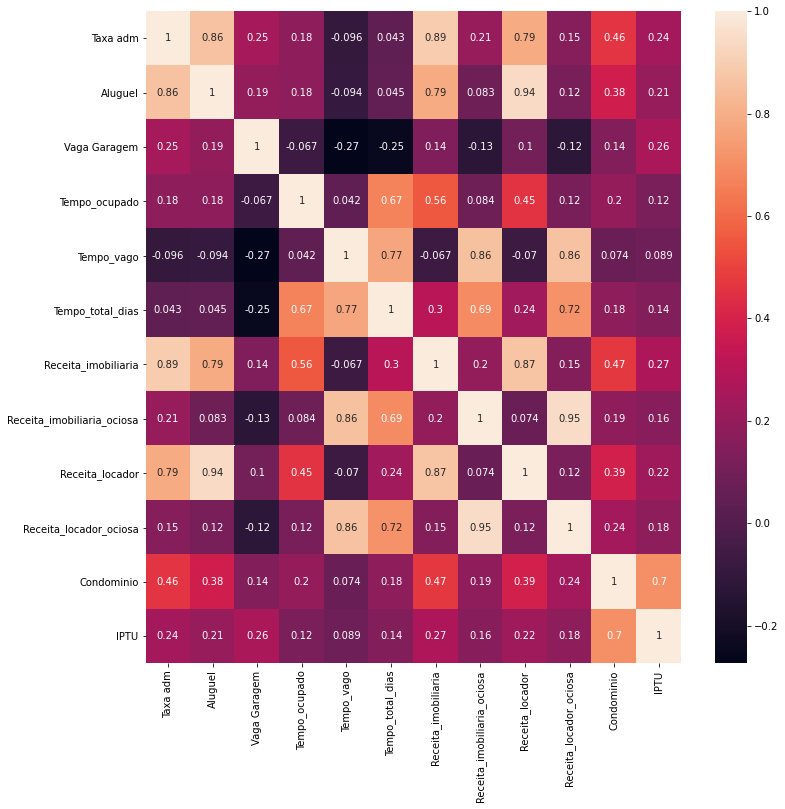

In [14]:
plt.figure(figsize = (12,12))
sns.heatmap(corr_num, annot = True);

### Tempo vago pode ser um indicador de desempenho para o dashboard, pois apresenta altos níveis de correlação direta com Receitas ociosas tanto da imobiliária quanto do locador

In [15]:
df_kpi = corr_num[['Tempo_vago', 'Receita_imobiliaria_ociosa', 'Receita_locador_ociosa']]
df_kpi = df_kpi.loc[['Tempo_vago', 'Receita_imobiliaria_ociosa', 'Receita_locador_ociosa'],
          ['Tempo_vago', 'Receita_imobiliaria_ociosa', 'Receita_locador_ociosa']]

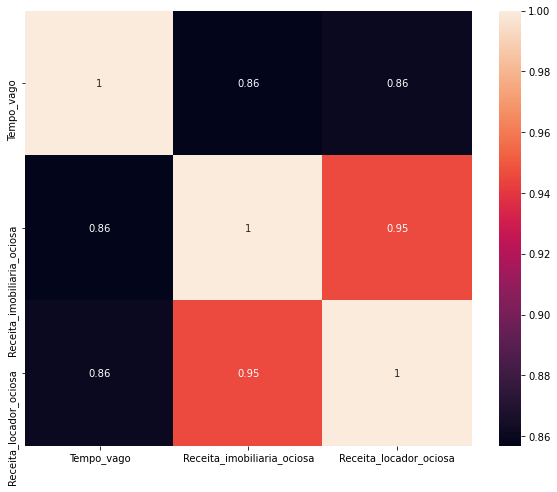

In [16]:
plt.figure(figsize = (10,8))
sns.heatmap(df_kpi, annot = True);

In [17]:
cat

,Tipo,Lugar,Endereco,Portabilidade,Trim_inicio_contrato,Ano_contrato
0,Residencial,artarq 101,"Apartamento no Pinheiros, R. Doutor Virgílio...",nao,T1-2020,2020
1,Residencial,artarq 162,"Apartamento no Pinheiros, R. Doutor Virgílio...",nao,T1-2020,2020
2,Residencial,artarq 193,"Apartamento no Pinheiros, R. Doutor Virgílio...",nao,T2-2018,2018
3,Residencial,artarq 203,"Apartamento no Pinheiros, R. Doutor Virgílio...",nao,T2-2018,2018
4,Residencial,artarq 203,"Apartamento no Pinheiros, R. Doutor Virgílio...",nao,T2-2020,2020
...,...,...,...,...,...,...
168,Residencial,theber 145,"Loft no Brooklin Paulista, R. Kansas 1700 1...",nao,T3-2019,2019
169,Residencial,visarb 132,"Apartamento no Jaguaré, R. Alexandre Calame ...",sim,T3-2019,2019
170,Residencial,visarb 132,"Apartamento no Jaguaré, R. Alexandre Calame ...",nao,T2-2020,2020
171,Residencial,vxchange 83,"Apartamento no Jardim Paulista, R. Batataes ...",nao,T4-2019,2019


## 1. Contratos de imóveis com vagas em garagem possuem os menores tempos de vacância (maior parte do tempo ocupados), logo, maior receita para a imobiliária.

#### Features necessárias: "Tempo Ocupado" e "Tempo Vago"

In [18]:
# Vagas com e sem garagens
df['Vaga Garagem'].value_counts()

0    82
1    76
2    10
3     3
4     2
Name: Vaga Garagem, dtype: int64

In [19]:
# tem garagem entao tem ocupacao
# soma-se os tempos totais de todos os imoveis com garagem e sem garagem separadamente e faz-se uma estatistica
# dos tempos de ocupados dentro deste tempo total
# divide-se com e sem garagens em duas bases distintas
sem_garagem = df[df['Vaga Garagem'] == 0]
com_garagem = df[df['Vaga Garagem'] != 0]

### 1.1. Imóveis SEM garagem

In [20]:
# Tempo_total_dias, Tempo_ocupado
perc_sem = (sem_garagem['Tempo_ocupado'].sum()/sem_garagem['Tempo_total_dias'].sum()) * 100
print(f'percentual do tempo ocupado dos imóveis sem garagem é {perc_sem:,.2f}%')

percentual do tempo ocupado dos imóveis sem garagem é 71.59%


### 1.2. Imóveis COM garagem

In [21]:
# Tempo_total_dias, Tempo_ocupado
perc_com = (com_garagem['Tempo_ocupado'].sum()/com_garagem['Tempo_total_dias'].sum()) * 100
print(f'percentual do tempo ocupado dos imóveis sem garagem é {perc_com:,.2f}%')

percentual do tempo ocupado dos imóveis sem garagem é 84.67%


### Gráficos dos percentuais

In [22]:
tempo_total = df['Tempo_total_dias'].sum()
tempo_total

165683

In [23]:
# tem garagem
df['Tem_garagem'] = np.NaN

In [24]:
def classify_garage(num):
    if num > 0:
        return 'sim'
    else:
        return 'nao'


df['Tem_garagem'] = df['Vaga Garagem'].map(classify_garage)

In [25]:
df

,Início,Término,Tipo,Taxa de administração,Taxa adm,Aluguel,Vaga Garagem,Entrada_imobiliaria,Lugar,Numero_contrato,...,Portabilidade,Receita_imobiliaria,Receita_imobiliaria_ociosa,Receita_locador,Receita_locador_ociosa,Trim_inicio_contrato,Ano_contrato,Condominio,IPTU,Tem_garagem
0,2020-01-03,2022-07-01,Residencial,0.05,285.0000,5700.00,0,2019-11-06,artarq 101,1,...,nao,8645.000000,551.00000,164255.00000,10469.00000,T1-2020,2020,1444.00,494.55,nao
1,2020-01-20,2022-07-01,Residencial,0.05,285.0000,5700.00,0,2020-01-03,artarq 162,1,...,nao,8483.500000,161.50000,161186.50000,3068.50000,T1-2020,2020,1444.00,494.55,nao
2,2018-05-18,2020-11-01,Residencial,0.04,180.8436,4521.09,1,2018-01-27,artarq 193,1,...,nao,5413.251760,669.12132,129918.04224,16058.91168,T2-2018,2018,800.39,308.98,sim
3,2018-05-01,2020-04-24,Residencial,0.07,300.4323,4291.89,1,2018-03-15,artarq 203,1,...,nao,7250.432840,470.67727,96327.17916,6253.28373,T2-2018,2018,800.39,308.98,sim
4,2020-04-24,2022-10-01,Residencial,0.07,304.5000,4350.00,1,2020-04-24,artarq 203,2,...,nao,9033.500000,0.00000,120016.50000,0.00000,T2-2020,2020,800.39,308.00,sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2019-09-09,2022-03-01,Residencial,0.07,474.6861,6781.23,0,2019-06-12,theber 145,1,...,nao,14303.874480,1408.23543,190037.18952,18709.41357,T3-2019,2019,1568.10,636.83,nao
169,2019-09-15,2020-05-18,Residencial,0.07,168.0000,2400.00,0,2019-09-15,visarb 132,1,...,sim,1377.600000,0.00000,18302.40000,0.00000,T3-2019,2019,835.00,265.00,nao
170,2020-05-18,2022-11-01,Residencial,0.07,154.0000,2200.00,0,2020-05-18,visarb 132,2,...,nao,4604.600000,0.00000,61175.40000,0.00000,T2-2020,2020,835.00,265.00,nao
171,2019-12-01,2020-10-09,Residencial,0.07,220.5000,3150.00,0,2019-05-15,vxchange 83,1,...,nao,2300.550000,1470.00000,30564.45000,19530.00000,T4-2019,2019,964.14,246.73,nao


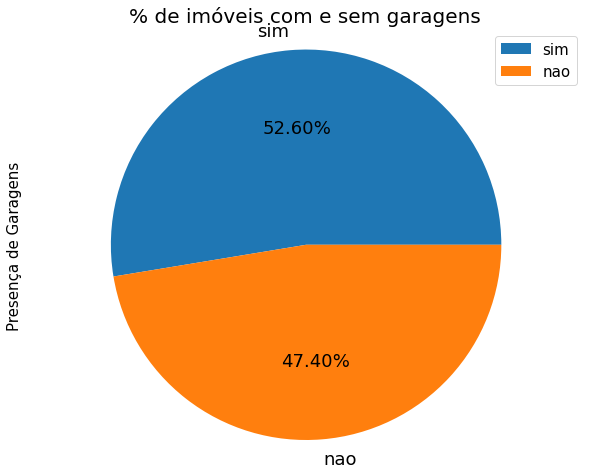

In [26]:
plt.figure(figsize = (10,8))
df['Tem_garagem'].value_counts().plot(kind = 'pie'
                                      , autopct = '%.2f%%'
                                      , fontsize = 18);
plt.axis('equal');
plt.title('% de imóveis com e sem garagens', fontsize = 20)
plt.ylabel('Presença de Garagens', fontsize = 15)
plt.legend(fontsize = 15)

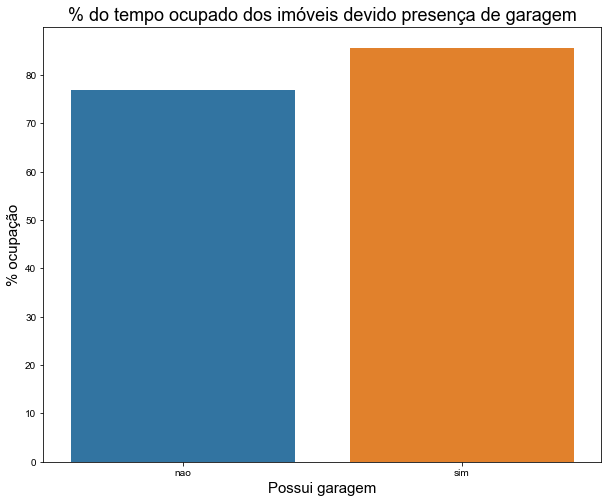

In [27]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'Tem_garagem', y = ((df['Tempo_ocupado']/df['Tempo_total_dias']) * 100), data = df, ci = False);
plt.title('% do tempo ocupado dos imóveis devido presença de garagem', fontsize = 18);
plt.ylabel('% ocupação', fontsize = 15);
plt.xlabel('Possui garagem', fontsize = 15);

sns.set_style('darkgrid')

### Verdadeiro: Analisando-se em percentuais, imóveis com garagem têm um percentual de ocupação maior em relação ao tempo total que o imóvel se encontra na carteira da imobiliária, logo a hipótese é verdadeira.

## 2. Imóveis com garagem oferecem maior receita para a imobiliária.

In [28]:
# verificando se imoveis com garagem fornecem maior receita a imobiliaria
aux = df[['Lugar', 'Tem_garagem','Vaga Garagem', 'Receita_imobiliaria']]
aux

,Lugar,Tem_garagem,Vaga Garagem,Receita_imobiliaria
0,artarq 101,nao,0,8645.000000
1,artarq 162,nao,0,8483.500000
2,artarq 193,sim,1,5413.251760
3,artarq 203,sim,1,7250.432840
4,artarq 203,sim,1,9033.500000
...,...,...,...,...
168,theber 145,nao,0,14303.874480
169,visarb 132,nao,0,1377.600000
170,visarb 132,nao,0,4604.600000
171,vxchange 83,nao,0,2300.550000


In [29]:
sim = aux[aux['Tem_garagem'] == 'sim']
nao = aux[aux['Tem_garagem'] == 'nao']
print(f'Imóveis COM garagem: {len(sim)}')
print(f'Imóveis SEM garagem: {len(nao)}')

Imóveis COM garagem: 91
Imóveis SEM garagem: 82


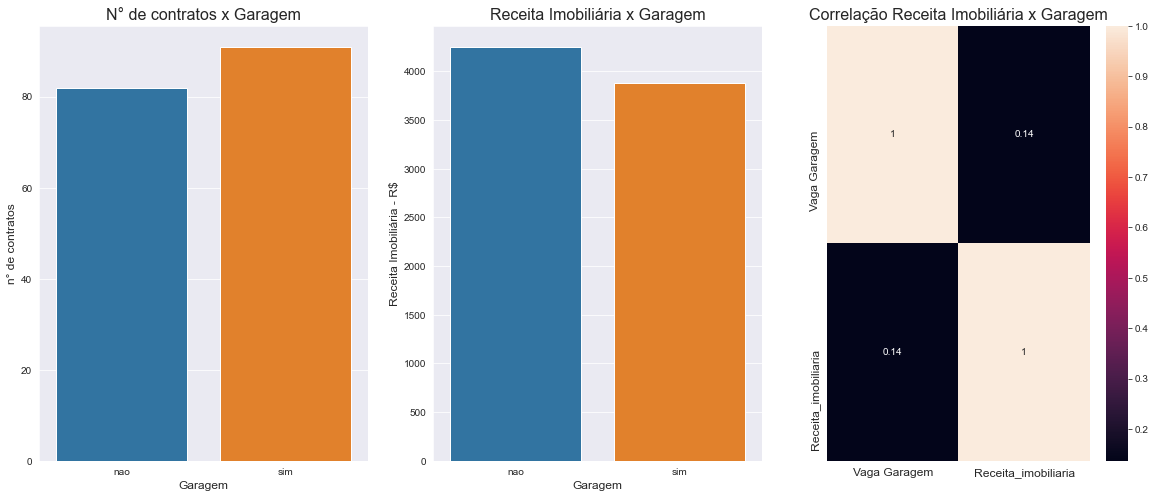

In [30]:
plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
sns.countplot(x = 'Tem_garagem', data = aux);
plt.title('N° de contratos x Garagem', fontsize = 16);
plt.ylabel('n° de contratos', fontsize = 12);
plt.xlabel('Garagem', fontsize = 12);

plt.subplot(1,3,2)
sns.barplot(x = 'Tem_garagem', y = 'Receita_imobiliaria', data = aux, ci = False);
plt.title('Receita Imobiliária x Garagem', fontsize = 16);
plt.ylabel('Receita Imobiliária - R$', fontsize = 12);
plt.xlabel('Garagem', fontsize = 12);

plt.subplot(1,3,3)
sns.heatmap(aux.corr(method = 'pearson'), annot = True);
plt.title('Correlação Receita Imobiliária x Garagem', fontsize = 16);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

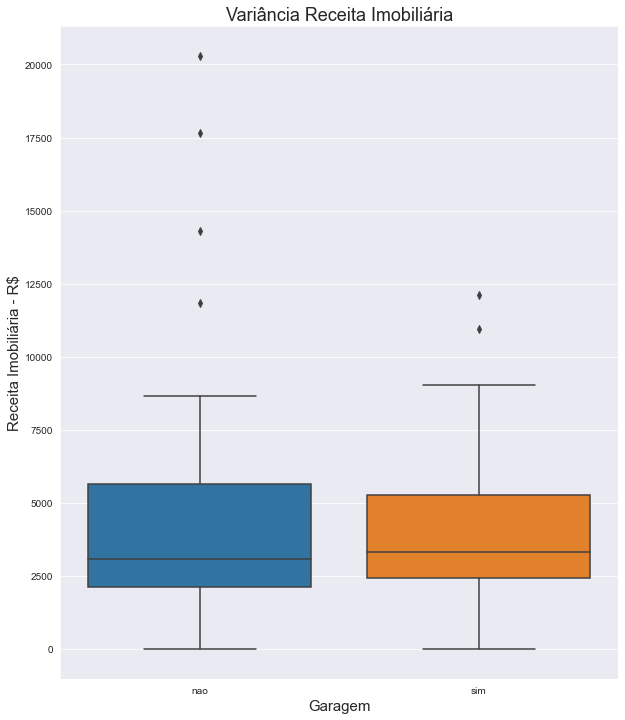

In [31]:
plt.figure(figsize = (10,12))
sns.boxplot(x = 'Tem_garagem', y = 'Receita_imobiliaria', data = aux);
plt.title('Variância Receita Imobiliária', fontsize = 18);
plt.ylabel('Receita Imobiliária - R$', fontsize = 15);
plt.xlabel('Garagem', fontsize = 15);

### Features criadas no Power Query nesta etapa: "Tempo_ocupado" e "Tempo_total_dias"

### Falso: Apesar de na hipótese anterior se confirmar que imóveis com garagem ficam ocupados por mais tempo (maior taxa de ocupação) e existir correlação significativa entre receita e tempo ocupado, neste teste pode-se observar que mesmo havendo um número maior de contratos de imóveis com garagem, a maior receita da imobiliária é garantida pelor imóveis que NÃO possuem garagens, além de uma correlação muito baixa entre a quantidade de garagem e a receita da imobiliária.

### Tal comportamento pode ser explicado por outros fatores inerentes ao imóvel que não necessariamente seja a presença de garagem, talvez fatores como localização ou estrutura interna dos apartamentos/casas podem ser mais importantes que o fate de haver ou não garagem.

## 3. Imóveis com maior tempo de ocupação tendem a gerar maior receita a empresa.

In [32]:
# Tempo de ocupação, Receita Imobiliária
df_1 = df.copy()

In [33]:
#aux_1
aux_1 = df_1[['Lugar', 'Tempo_ocupado','Receita_imobiliaria']].groupby('Lugar').mean().reset_index()

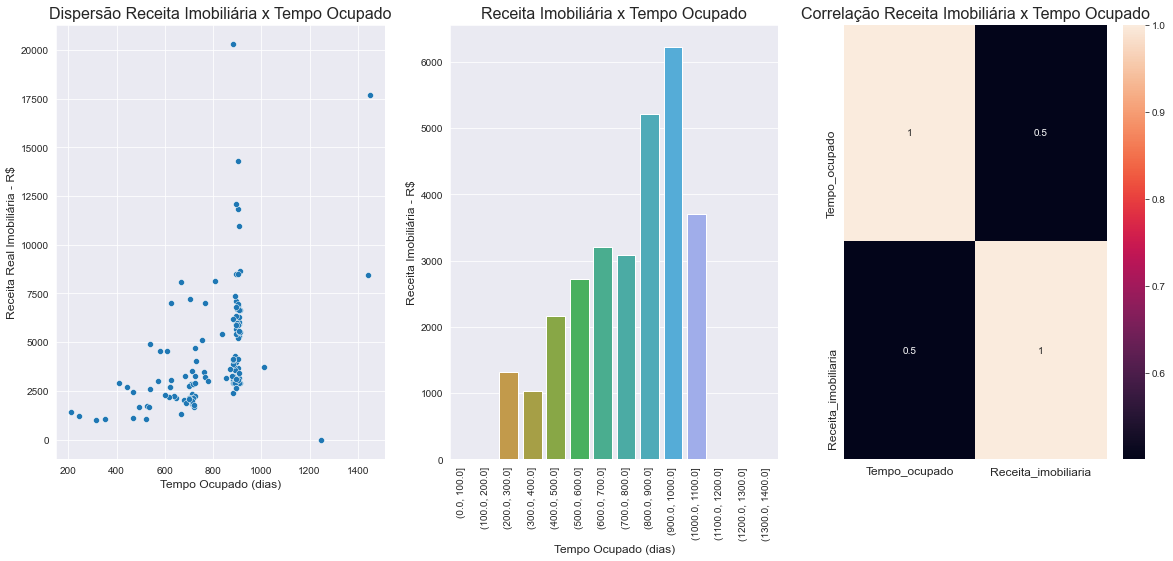

In [34]:
plt.figure(figsize = (20,8))
sns.set_style('darkgrid')

plt.subplot(1,3,1)
sns.scatterplot(x = 'Tempo_ocupado', y = 'Receita_imobiliaria', data = aux_1);
plt.title('Dispersão Receita Imobiliária x Tempo Ocupado', fontsize = 16)
plt.xlabel('Tempo Ocupado (dias)', fontsize = 12);
plt.ylabel('Receita Real Imobiliária - R$', fontsize = 12);


plt.subplot(1,3,2)
bins = list(np.arange(0, max(aux_1['Tempo_ocupado']), 100))
aux_1['Tempo_ocupado_bins'] = pd.cut(aux_1['Tempo_ocupado'], bins = bins)
sns.barplot(x = 'Tempo_ocupado_bins', y = 'Receita_imobiliaria', data = aux_1, ci = False);
plt.xticks(rotation = 90)
plt.title('Receita Imobiliária x Tempo Ocupado', fontsize = 16)
plt.xlabel('Tempo Ocupado (dias)', fontsize = 12)
plt.ylabel('Receita Imobiliária - R$', fontsize = 12)

plt.subplot(1,3,3)
sns.heatmap(aux_1.corr(method = 'pearson'), annot = True);
plt.title('Correlação Receita Imobiliária x Tempo Ocupado', fontsize = 16);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

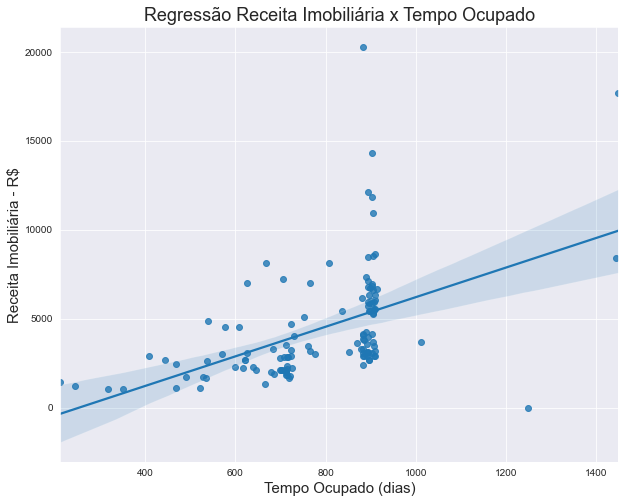

In [35]:
plt.figure(figsize = (10,8))
sns.regplot(x = 'Tempo_ocupado', y = 'Receita_imobiliaria', data = aux_1);
plt.title('Regressão Receita Imobiliária x Tempo Ocupado', fontsize = 18);
plt.xlabel('Tempo Ocupado (dias)', fontsize = 15);
plt.ylabel('Receita Imobiliária - R$', fontsize = 15);

### Verdadeiro: Apesar de uma correlação não tão forte, percebe-se visualmente que um maior tempo de ocupação do imóvel oferece sim uma maior receita para a empresa. Até o tempo de ocupação em 1000 dias percebe-se essa tendência, após isto, o número de imóveis é insignificante. 

### Features criadas: "Receita Imobiliária"

## 4. Imóveis de transferência de carteira têm uma viabilidade econômica melhor para empresa devido à ausência do tempo ocioso (maior receita para a imobiliária).

In [36]:
df_2 = df.copy()

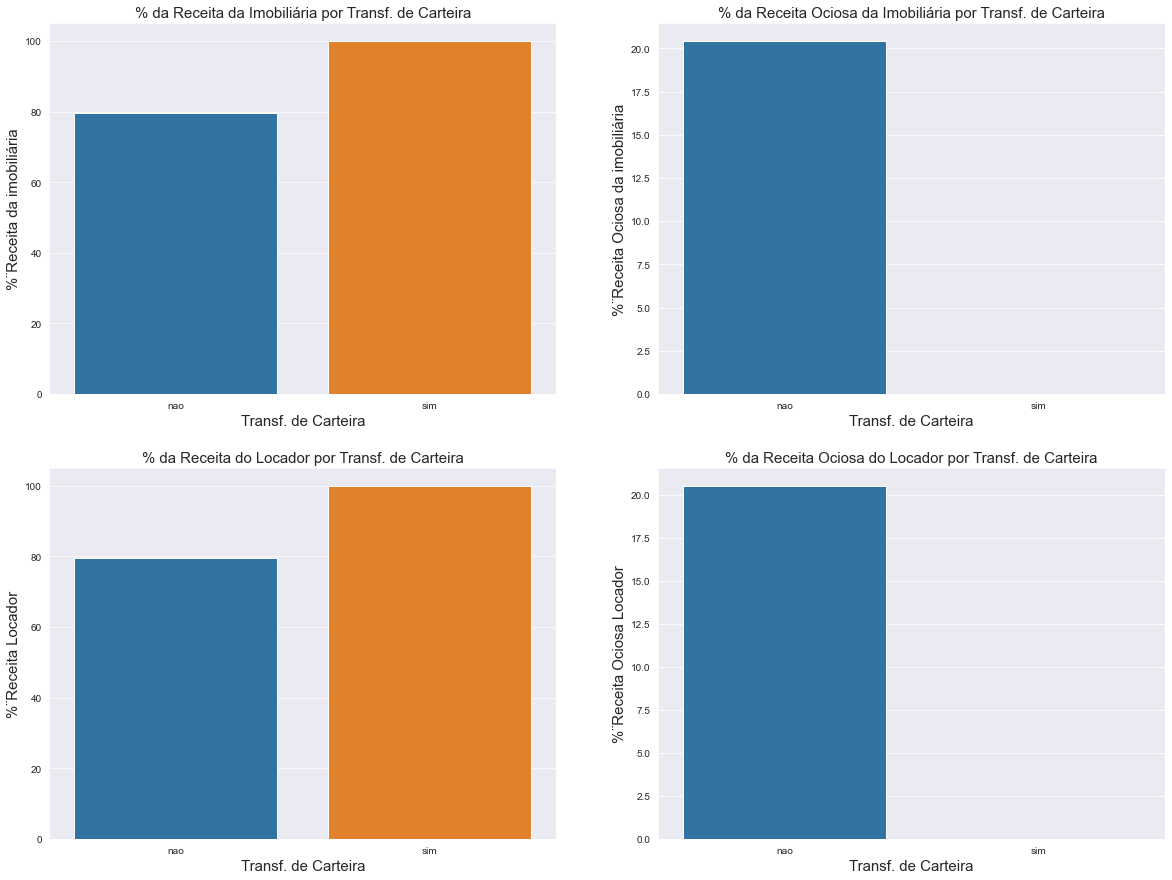

In [37]:
# graficos de percentuais de receita e receita ociosa para o locador e a imobiliária em relacao a "Portabilidade"
# Receita e Receita Ociosa para a Imobiliaria
Receita_proj_imob = df_2['Receita_imobiliaria'] + df_2['Receita_imobiliaria_ociosa']
Receita_proj_loca = df_2['Receita_locador'] + df_2['Receita_locador_ociosa']
#Receita imobiliaria
plt.figure(figsize = (20,15))
sns.set_style('darkgrid')

plt.subplot(2, 2, 1)
sns.barplot(x = 'Portabilidade',
            y = (((df_2['Receita_imobiliaria'])/(Receita_proj_imob)) * 100),
            data = df_2,
           ci = False);
plt.xlabel('Transf. de Carteira', fontsize = 15);
plt.ylabel('%¨Receita da imobiliária', fontsize = 15);
plt.title('% da Receita da Imobiliária por Transf. de Carteira', fontsize = 15);

plt.subplot(2, 2, 2)
sns.barplot(x = 'Portabilidade',
            y = (((df_2['Receita_imobiliaria_ociosa'])/(Receita_proj_imob)) * 100),
            data = df_2,
           ci = False);
plt.xlabel('Transf. de Carteira', fontsize = 15);
plt.ylabel('%¨Receita Ociosa da imobiliária', fontsize = 15);
plt.title('% da Receita Ociosa da Imobiliária por Transf. de Carteira', fontsize = 15);

# Receita e Receita Ociosa para o Locador
plt.subplot(2, 2, 3)
sns.barplot(x = 'Portabilidade',
            y = (((df_2['Receita_locador'])/(Receita_proj_loca)) * 100),
            data = df_2,
           ci = False);
plt.xlabel('Transf. de Carteira', fontsize = 15);
plt.ylabel('%¨Receita Locador', fontsize = 15);
plt.title('% da Receita do Locador por Transf. de Carteira', fontsize = 15);

plt.subplot(2, 2, 4)
sns.barplot(x = 'Portabilidade',
            y = (((df_2['Receita_locador_ociosa'])/(Receita_proj_loca)) * 100),
            data = df_2,
           ci = False);
plt.xlabel('Transf. de Carteira', fontsize = 15);
plt.ylabel('%¨Receita Ociosa Locador', fontsize = 15);
plt.title('% da Receita Ociosa do Locador por Transf. de Carteira', fontsize = 15);

### Verdadeiro: o percentual das receitas arrecadadas tanto por parte da imobiliária quanto para os locadores proprietários atingem 100% para os imóveis que vieram de transferência de carteira e, análogamente, em receita ociosa para ambas as partes os mesmos imóveis têm 0% de receita ociosa, enquanto os imóveis que NÃO vieram de transferência de carteira possuem pouco mais de 20% de sua receita ociosa, receita proveniente do tempo do imóvel desocupado, enquanto os positivos para transferência de carteira não possuem absolutamente nenhum percentual para receitas não arrecadadas por tempo desocupado.

### Features Criadas: "Receita Imobiliária", "Receita Ociosa Imobiliária", "Receita Locador", "Receita Ociosa Locador"

## 5. Imóveis com menor valor de aluguel tendem a ter uma maior ocupação.

In [38]:
aux_2 = df_1[['Lugar' ,'Tempo_ocupado', 'Aluguel']].groupby('Lugar').mean().reset_index()

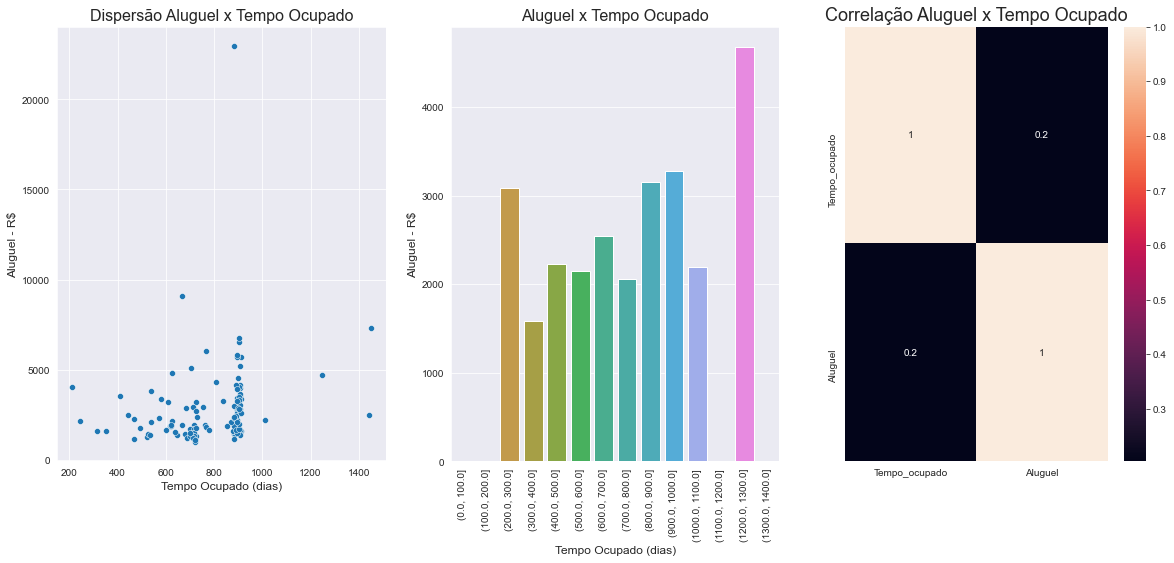

In [39]:
plt.figure(figsize = (20, 8));

plt.subplot(1, 3, 1)
sns.scatterplot(x = 'Tempo_ocupado', y = 'Aluguel' , data = aux_2)
plt.title('Dispersão Aluguel x Tempo Ocupado', fontsize = 16)
plt.xlabel('Tempo Ocupado (dias)', fontsize = 12)
plt.ylabel('Aluguel - R$', fontsize = 12)

plt.subplot(1, 3, 2)
bins = list(np.arange(0, max(aux_2['Tempo_ocupado']), 100))
aux_2['Tempo_ocupado_bins'] = pd.cut(aux_2['Tempo_ocupado'], bins = bins)
sns.barplot(x = 'Tempo_ocupado_bins', y = 'Aluguel', data = aux_2, ci = False)
plt.xticks(rotation = 90)
plt.title('Aluguel x Tempo Ocupado', fontsize = 16)
plt.xlabel('Tempo Ocupado (dias)', fontsize = 12)
plt.ylabel('Aluguel - R$', fontsize = 12)

plt.subplot(1, 3, 3)
sns.heatmap(aux_2.corr(method = 'pearson'), annot = True)
plt.title('Correlação Aluguel x Tempo Ocupado', fontsize = 18);

sns.set_style('darkgrid')

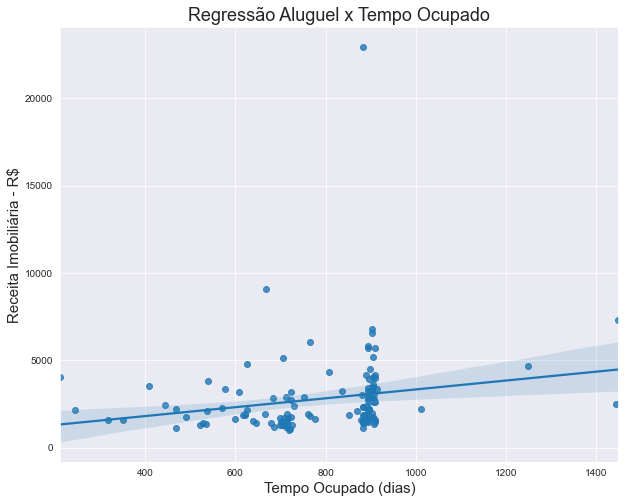

In [40]:
plt.figure(figsize = (10,8))
sns.regplot(x = 'Tempo_ocupado', y = 'Aluguel' , data = aux_2);
plt.title('Regressão Aluguel x Tempo Ocupado', fontsize = 18);
plt.xlabel('Tempo Ocupado (dias)', fontsize = 15);
plt.ylabel('Receita Imobiliária - R$', fontsize = 15);

### Falso: Além de apresentar baixa correlação entre tempo ocupado e valor do aluguel, há uma diferença pouco significativa nas barras com, inclusive, maior concentração dos maiores aluguéis nos intervalos de maiores tempos de ocupação, ou seja, segundo os dados, imóveis com maior valor de aluguel tendem a ser os imóveis com  maiores valores de aluguéis. Apesar do senso comum dizer o contrário, imóveis mais baratos ficarem sempre ocupados devido ao preço atrativo, os imóveis mais caros apesar do preço mais elevado, matém uma taxa de ocupação maior que os de preços mais em conta devido à outros fatores que podem ser atrativos aos olhos do inquilino como por exemplo fatores relcionados à localização (valorização do bairro, segurança, facilidade de transporte/mobilidade, qualidade de vida do local) ou até mesmo a própria estrutura do imóvel. Resumindo: Preço dos imóveis não é o único fator decisivo para a preferência do cliente.

## 6. Imóveis com menor valor de aluguel tendem a oferecer maior receita para a imobiliária.

In [41]:
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Taxa adm                    173 non-null    float64
 1   Aluguel                     173 non-null    float64
 2   Vaga Garagem                173 non-null    int64  
 3   Tempo_ocupado               173 non-null    int64  
 4   Tempo_vago                  173 non-null    int64  
 5   Tempo_total_dias            173 non-null    int64  
 6   Receita_imobiliaria         173 non-null    float64
 7   Receita_imobiliaria_ociosa  173 non-null    float64
 8   Receita_locador             173 non-null    float64
 9   Receita_locador_ociosa      173 non-null    float64
 10  Condominio                  173 non-null    float64
 11  IPTU                        173 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 16.3 KB


In [42]:
aux_3 = df_2[['Lugar', 'Aluguel', 'Receita_imobiliaria']].groupby('Lugar').mean().reset_index()

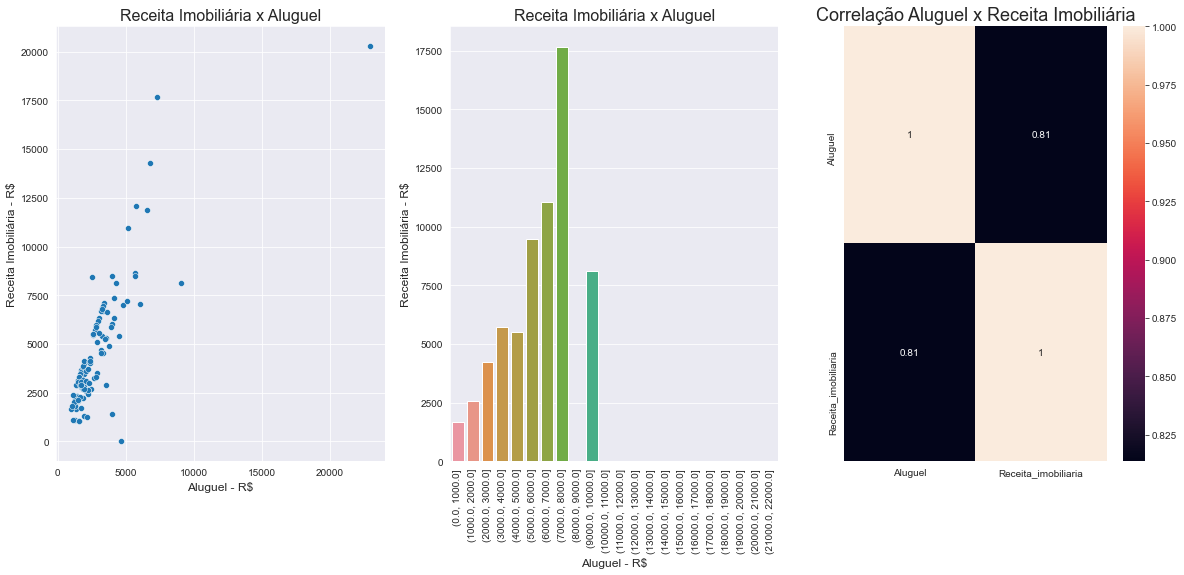

In [43]:
plt.figure(figsize = (20, 8));

plt.subplot(1, 3, 1)
sns.scatterplot(x = 'Aluguel', y = 'Receita_imobiliaria' , data = aux_3);
plt.title('Receita Imobiliária x Aluguel', fontsize = 16);
plt.xlabel('Aluguel - R$', fontsize = 12);
plt.ylabel('Receita Imobiliária - R$', fontsize = 12);

plt.subplot(1, 3, 2)
bins = list(np.arange(0, max(aux_3['Aluguel']), 1000))
aux_3['Aluguel_bins'] = pd.cut(aux_3['Aluguel'], bins = bins)
sns.barplot(x = 'Aluguel_bins', y = 'Receita_imobiliaria', data = aux_3, ci = False)
plt.xticks(rotation = 90)
plt.title('Receita Imobiliária x Aluguel', fontsize = 16)
plt.xlabel('Aluguel - R$', fontsize = 12)
plt.ylabel('Receita Imobiliária - R$', fontsize = 12)


plt.subplot(1, 3, 3)
sns.heatmap(aux_3.corr(method = 'pearson'), annot = True)
plt.title('Correlação Aluguel x Receita Imobiliária', fontsize = 18);

sns.set_style('darkgrid')

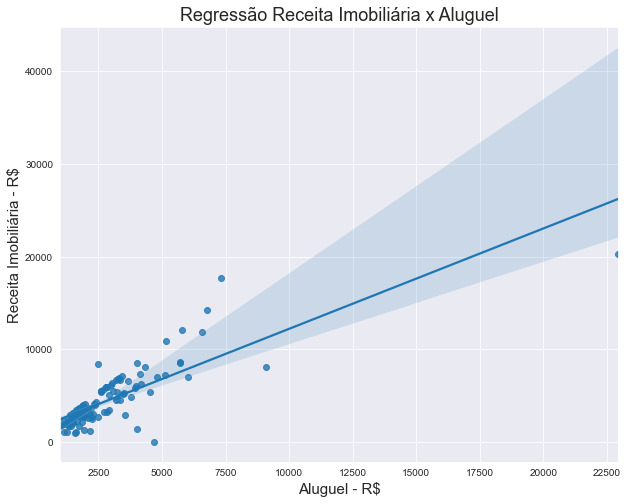

In [44]:
plt.figure(figsize = (10,8))
sns.regplot(x = 'Aluguel', y = 'Receita_imobiliaria', data = aux_3);
plt.title('Regressão Receita Imobiliária x Aluguel', fontsize = 18);
plt.xlabel('Aluguel - R$', fontsize = 15);
plt.ylabel('Receita Imobiliária - R$', fontsize = 15);

### Falso: Imóveis com menores valores de aluguel oferecem sim maior receita à imobiliária, isto ocorre pois o valor do aluguel tem correlação direta com a receita da empresa, quanto maior o aluguel amior a taxa de admin. e maior a receita. O que poderia representar um cenário inverso seria o fato de imóveis com preços de aluguéis mais elevados apresentarem tempos vagos maiores, mas já foi verificado na hipótese anterior que isso não se aplica, que imóveis mais caros tendem a ter maior ocupação. 

## 7. Quanto maior o valor do aluguel maior a receita ociosa.

In [45]:
aux_4 = df_2[['Lugar', 'Aluguel', 'Receita_imobiliaria_ociosa']].groupby('Lugar').mean().reset_index()

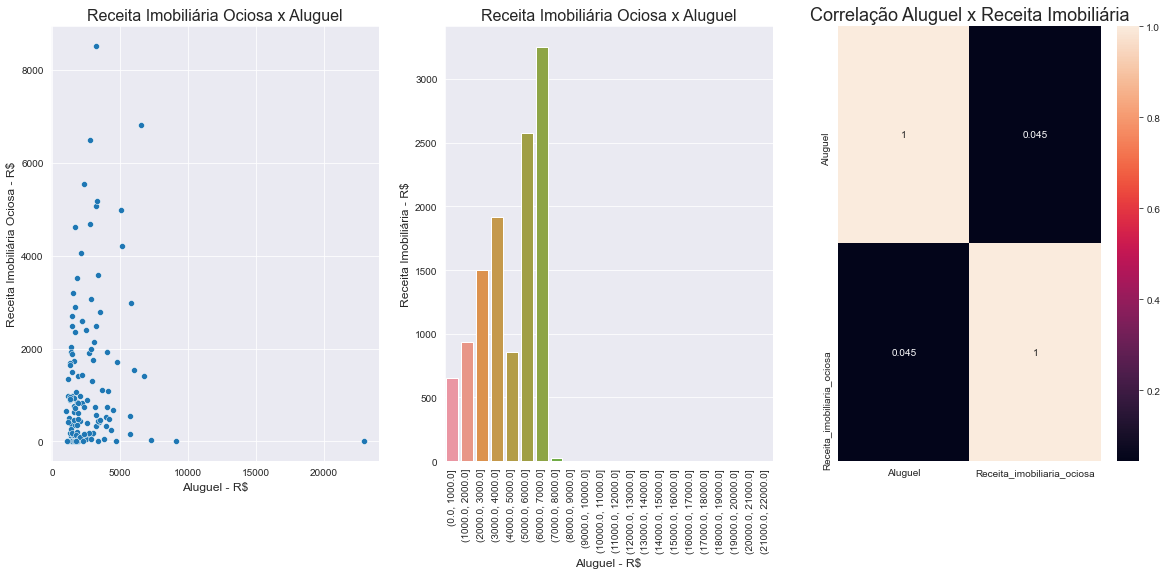

In [46]:
plt.figure(figsize = (20, 8));

plt.subplot(1, 3, 1)
sns.scatterplot(x = 'Aluguel', y = 'Receita_imobiliaria_ociosa' , data = aux_4);
plt.title('Receita Imobiliária Ociosa x Aluguel', fontsize = 16);
plt.xlabel('Aluguel - R$', fontsize = 12);
plt.ylabel('Receita Imobiliária Ociosa - R$', fontsize = 12);

plt.subplot(1, 3, 2)
bins = list(np.arange(0, max(aux_4['Aluguel']), 1000))
aux_4['Aluguel_bins'] = pd.cut(aux_4['Aluguel'], bins = bins)
sns.barplot(x = 'Aluguel_bins', y = 'Receita_imobiliaria_ociosa', data = aux_4, ci = False);
plt.xticks(rotation = 90)
plt.title('Receita Imobiliária Ociosa x Aluguel', fontsize = 16);
plt.xlabel('Aluguel - R$', fontsize = 12);
plt.ylabel('Receita Imobiliária - R$', fontsize = 12);

plt.subplot(1, 3, 3)
sns.heatmap(aux_4.corr(method = 'pearson'), annot = True);
plt.title('Correlação Aluguel x Receita Imobiliária', fontsize = 18);

sns.set_style('darkgrid')

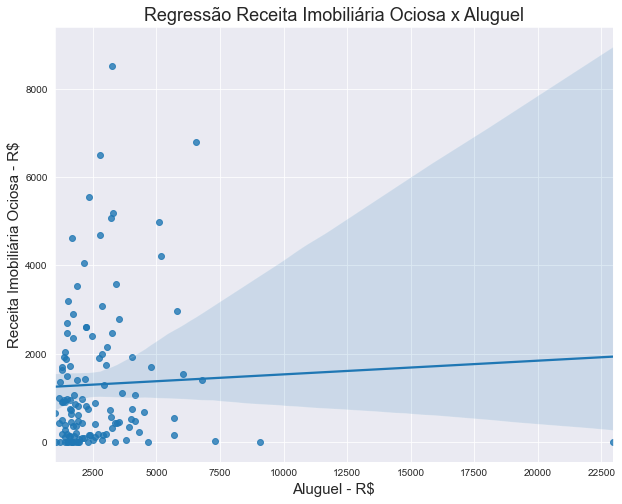

In [47]:
plt.figure(figsize = (10,8))
sns.regplot(x = 'Aluguel', y = 'Receita_imobiliaria_ociosa', data = aux_4);
plt.title('Regressão Receita Imobiliária Ociosa x Aluguel', fontsize = 18);
plt.xlabel('Aluguel - R$', fontsize = 15);
plt.ylabel('Receita Imobiliária Ociosa - R$', fontsize = 15);

### Falso: Análogamente à hipótese de n° 5 na qual foi constatado que imóveis com menor valor de aluguel tendem a oferecer maior receita para a imobiliária, neste teste, de forma oposta, pode-se concluir que imóveis com maior valor de aluguel tendem a ter mais procura, conforme já avaliado anteriormente, e consequentemente menor receita ociosa  (oferecem maior receita à imobiliária devido sua alta procura, apesar do senso comum de que imóveis de aluguel elevado possuem baixa procura).

## 7. Imóveis com menores valores de aluguel oferecem menores receitas para a imobiliária.

In [48]:
aux_5 = df_2[['Lugar', 'Aluguel', 'Receita_imobiliaria']].groupby('Lugar').mean().reset_index()
aux_5

,Lugar,Aluguel,Receita_imobiliaria
0,artarq 101,5700.000,8645.000000
1,artarq 162,5700.000,8483.500000
2,artarq 193,4521.090,5413.251760
3,artarq 203,4320.945,8141.966420
4,artarq 211,6556.160,11853.537280
...,...,...,...
120,soloff 404,1730.770,2919.808990
121,tembel 1607,2350.000,4150.100000
122,theber 145,6781.230,14303.874480
123,visarb 132,2300.000,2991.100000


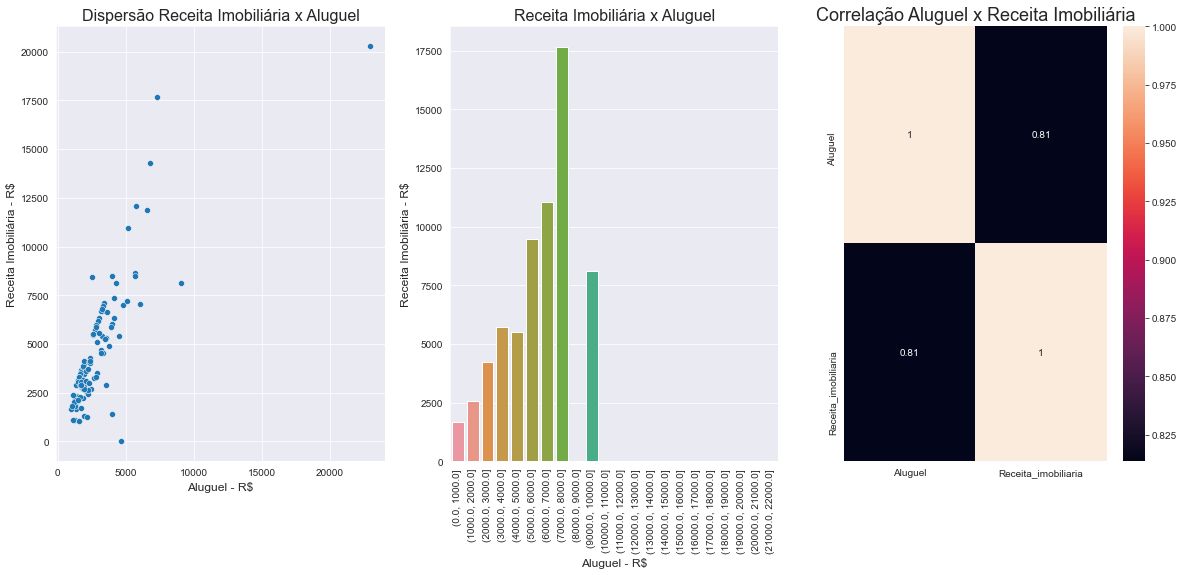

In [49]:
plt.figure(figsize = (20, 8));

plt.subplot(1, 3, 1)
sns.scatterplot(x = 'Aluguel', y = 'Receita_imobiliaria' , data = aux_5);
plt.title('Dispersão Receita Imobiliária x Aluguel', fontsize = 16);
plt.xlabel('Aluguel - R$', fontsize = 12);
plt.ylabel('Receita Imobiliária - R$', fontsize = 12);

plt.subplot(1, 3, 2)
bins = list(np.arange(0, max(aux_5['Aluguel']), 1000))
aux_5['Aluguel_bins'] = pd.cut(aux_5['Aluguel'], bins = bins)
sns.barplot(x = 'Aluguel_bins', y = 'Receita_imobiliaria', data = aux_5, ci = False);
plt.xticks(rotation = 90)
plt.title('Receita Imobiliária x Aluguel', fontsize = 16);
plt.xlabel('Aluguel - R$', fontsize = 12);
plt.ylabel('Receita Imobiliária - R$', fontsize = 12);

plt.subplot(1, 3, 3)
sns.heatmap(aux_5.corr(method = 'pearson'), annot = True)
plt.title('Correlação Aluguel x Receita Imobiliária', fontsize = 18);

sns.set_style('darkgrid')

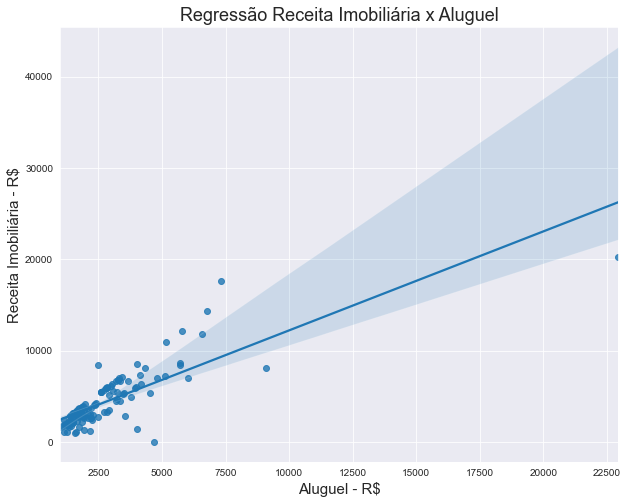

In [50]:
plt.figure(figsize = (10,8))
sns.regplot(x = 'Aluguel', y = 'Receita_imobiliaria', data = aux_5);
plt.title('Regressão Receita Imobiliária x Aluguel', fontsize = 18);
plt.xlabel('Aluguel - R$', fontsize = 15);
plt.ylabel('Receita Imobiliária - R$', fontsize = 15);

### Verdadeiro: Análogamente à hipótese de n° 4 que foi constatado FALSO para hipótese de que menores aluguéis oferecem maiores receitas à imobiliária, neste pode-se observar um comportamento de crescimento proporcional na relação entre aluguel e receita, quanto maior o valor do aluguel maior a receita para a imobiliária

## 8. Imóveis com mais contratos tendem a ter um tempo de ocupação maior.

In [51]:
df_2['Numero_contrato'] = df_2['Numero_contrato'].astype('str')

In [52]:
aux_6 = df_2[['Numero_contrato', 'Tempo_ocupado', 'Tempo_vago']].groupby('Numero_contrato').sum().reset_index()
aux_6['Tempo_total'] = aux_6['Tempo_ocupado'] + aux_6['Tempo_vago']

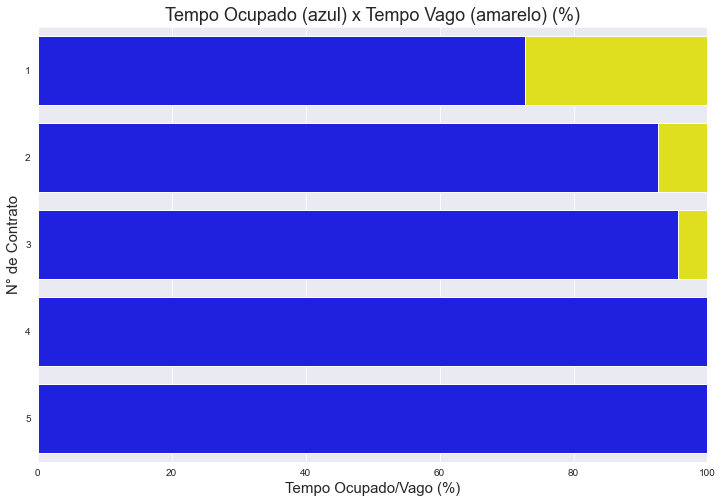

In [53]:
# Fazer análise em termos de percentuais por numero de contratos
plt.figure(figsize = (12, 8))

tempo_ocupado = ((aux_6['Tempo_ocupado']/aux_6['Tempo_total']) * 100)
tempo_vago = ((aux_6['Tempo_vago']/aux_6['Tempo_total']) * 100)

sns.barplot(x = tempo_ocupado, 
            y = 'Numero_contrato', 
            data = aux_6, 
           color = 'blue');

sns.barplot(x = tempo_vago, 
            y = 'Numero_contrato', 
            data = aux_6, 
           color = 'yellow',
           left = tempo_ocupado);

plt.title('Tempo Ocupado (azul) x Tempo Vago (amarelo) (%)', fontsize = 18);
plt.xlabel('Tempo Ocupado/Vago (%)', fontsize = 15);
plt.ylabel('N° de Contrato', fontsize = 15);

### verdadeiro: Os primeiros contratos quando um imóvel passa a integrar a carteira da imobiliária tendem a ter tempos vagos maiores e, com o passar do tempo, o tempo vago passa a dar lugar ao tempo ocupado. Tal comportamento ocorre por dois motivos: o primeiro a existência de imóveis com transferência de carteira que possuem 0% de tempo vago e que podem haver mais de um contrato desta modalidade. O segundo motivo pode ser uma possível melhoria nas estruturas dos imóveis nos quais podem representar alguma aceitação social por parte dos clientes para com esses imóveis fazendo com que o tempo vago diminua ao longo do tempo, bom como renovações de contratos (Contratos diferentes podem ser feitos com um mesmo inquilino)

## 9. Imóveis comerciais oferecem maior receita à imobiliária.

In [54]:
df_2[['Lugar','Tipo','Receita_imobiliaria']]

,Lugar,Tipo,Receita_imobiliaria
0,artarq 101,Residencial,8645.000000
1,artarq 162,Residencial,8483.500000
2,artarq 193,Residencial,5413.251760
3,artarq 203,Residencial,7250.432840
4,artarq 203,Residencial,9033.500000
...,...,...,...
168,theber 145,Residencial,14303.874480
169,visarb 132,Residencial,1377.600000
170,visarb 132,Residencial,4604.600000
171,vxchange 83,Residencial,2300.550000


In [55]:
aux_7 = df_2[['Lugar','Tipo','Receita_imobiliaria']].groupby(['Lugar', 'Tipo']).sum().reset_index()

### Imóveis analisados como valores únicos

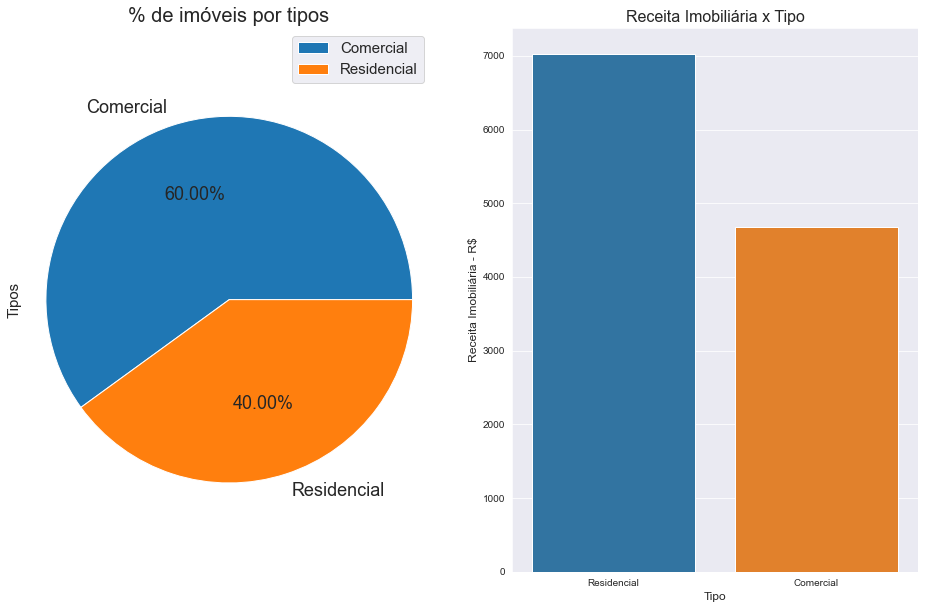

In [56]:
plt.figure(figsize = (16,10))

plt.subplot(1,2,1)
aux_7['Tipo'].value_counts().plot(kind = 'pie', 
                                  autopct = '%.2f%%', 
                                  fontsize = 18);
plt.axis('equal');
plt.title('% de imóveis por tipos', fontsize = 20)
plt.ylabel('Tipos', fontsize = 15)
plt.legend(fontsize = 15)

plt.subplot(1,2,2)
sns.barplot(x = 'Tipo', 
            y = 'Receita_imobiliaria', 
            data = aux_7, 
            ci = False);
plt.title('Receita Imobiliária x Tipo', fontsize = 16);
plt.xlabel('Tipo', fontsize = 12);
plt.ylabel('Receita Imobiliária - R$', fontsize = 12);


### Imóveis analisados como contratos

In [57]:
aux_8 = df_2[['Lugar','Tipo','Receita_imobiliaria']]

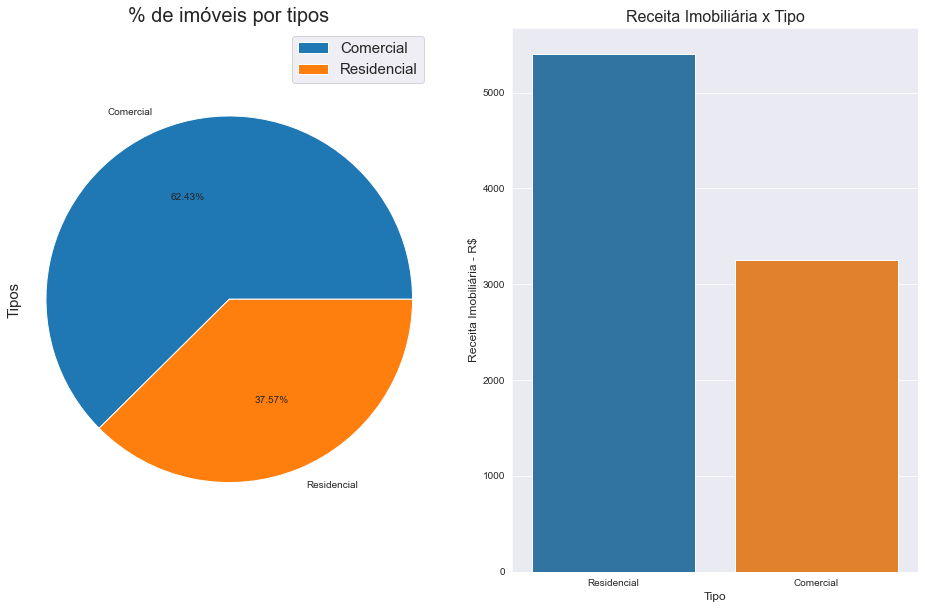

In [58]:
plt.figure(figsize = (16,10))

plt.subplot(1,2,1)
aux_8['Tipo'].value_counts().plot(kind = 'pie', autopct = '%.2f%%');
plt.axis('equal');
plt.title('% de imóveis por tipos', fontsize = 20);
plt.ylabel('Tipos', fontsize = 15);
plt.legend(fontsize = 15);


plt.subplot(1,2,2)
sns.barplot(x = 'Tipo', 
            y = 'Receita_imobiliaria', 
            data = aux_8, 
            ci = False);
plt.title('Receita Imobiliária x Tipo', fontsize = 16);
plt.xlabel('Tipo', fontsize = 12);
plt.ylabel('Receita Imobiliária - R$', fontsize = 12);

In [59]:
df_2_com = df_2[df_2['Tipo'] == 'Comercial']
df_2_res = df_2[df_2['Tipo'] == 'Residencial']

In [60]:
receita_com = df_2_com['Receita_imobiliaria'].sum()
receita_res = df_2_res['Receita_imobiliaria'].sum()
receita_tot = df_2['Receita_imobiliaria'].sum()
percent_com = (receita_com/receita_tot) * 100
percent_res = (receita_res/receita_tot) * 100
print(f'Imóveis do tipo COMERCIAIS representam {percent_com}% da receita total da imobiliária')
print(f'Imóveis do tipo RESIDENCIAIS representam {percent_res}% da receita total da imobiliária')

Imóveis do tipo COMERCIAIS representam 49.993978435822754% da receita total da imobiliária
Imóveis do tipo RESIDENCIAIS representam 50.00602156417725% da receita total da imobiliária


### Falso: Apesar da significativa superioridade tanto em números de imóveis desse tipo quanto em contratos esta categoria de imóvel não é responsável pela maior parte da receita da imobiliária e sim os imóveis do tipo residenciais. Os imóveis residenciais apesar de corresponderem a 40% dos imóveis da carteira da imobiliária e 37,57% de todos os contratos, ativos e inativos, esta categoria representa 50% da receita total da imobiliária. Logo, pode-se afirmar que a hipótese é FALSA pois os imóveis do tipo RESIDENCIAIS oferecem uma maior receita à empresa, apesar de aparentemente a proporção de imóveis dizer o oposto.